<a href="https://colab.research.google.com/github/viabrinsa/PCVK_VirginiaAbrinsa/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Accessing My Googlee Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

Gamma Correction pada citra
--------------------------------
Masukan Nilai Gamma : 5


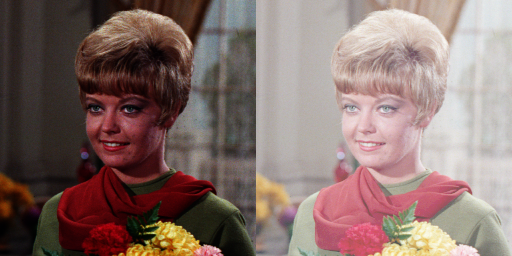

In [5]:
#no1 gamma
print('Gamma Correction pada citra')
print('--------------------------------')
try:
  nilaiGamma = int(input('Masukan Nilai Gamma : '))
except ValueError:
  print('Error, not a number')
  
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)


img = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
gammaImg = gammaCorrection(img, nilaiGamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

Masukan Nilai Bit Depth : 1


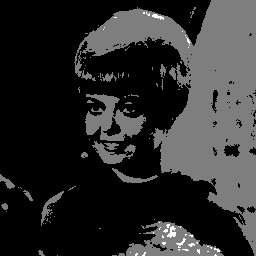

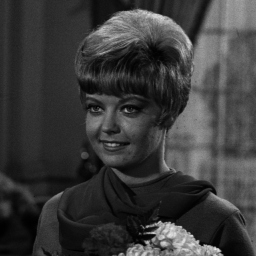

In [14]:
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

try :
  bit = int(input('Masukan Nilai Bit Depth : '))
except ValueError :
  print('Number Error')

level = 255/(2**bit)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

  
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(depth_image)
cv2_imshow(original)

In [17]:
import glob
import math
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

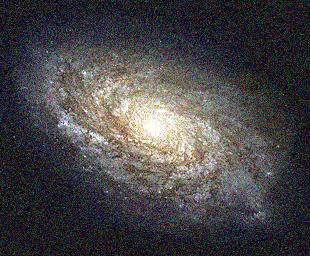

In [18]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [22]:
def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 80
Nilai PSNR: 
31.306084630495718
